In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('/content/Retail_Transaction_Dataset.csv')

In [3]:
# Handle missing values
data = data.dropna()

# Convert TransactionDate to datetime
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'], errors='coerce')

# Extract year, month, and day from TransactionDate
data['Year'] = data['TransactionDate'].dt.year
data['Month'] = data['TransactionDate'].dt.month
data['Day'] = data['TransactionDate'].dt.day

# Ensure numerical columns are correctly formatted
data['Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce')
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')
data['DiscountApplied(%)'] = pd.to_numeric(data['DiscountApplied(%)'], errors='coerce')
data['TotalAmount'] = pd.to_numeric(data['TotalAmount'], errors='coerce')


          CustomerID       Quantity          Price  \
count  100000.000000  100000.000000  100000.000000   
mean   500463.982180       5.009290      55.067344   
min        14.000000       1.000000      10.000430   
25%    250693.750000       3.000000      32.549474   
50%    499679.000000       5.000000      55.116789   
75%    751104.750000       7.000000      77.456763   
max    999997.000000       9.000000      99.999284   
std    288460.917524       2.579808      25.971567   

                     TransactionDate  DiscountApplied(%)    TotalAmount  \
count                         100000       100000.000000  100000.000000   
mean   2023-10-29 15:40:05.471399936           10.020155     248.334955   
min              2023-04-29 22:27:00            0.000046       8.274825   
25%              2023-07-30 06:45:15            5.001013      95.163418   
50%              2023-10-30 05:12:30           10.030353     200.368393   
75%              2024-01-29 05:44:00           15.018367     36

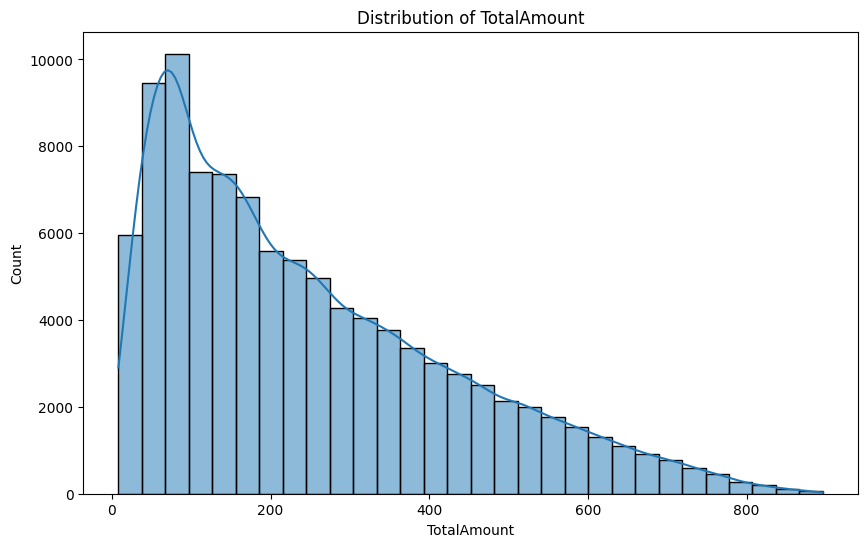

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(data.describe())

# Distribution of TotalAmount
plt.figure(figsize=(10, 6))
sns.histplot(data['TotalAmount'], bins=30, kde=True)
plt.title('Distribution of TotalAmount')
plt.show()

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['number'])


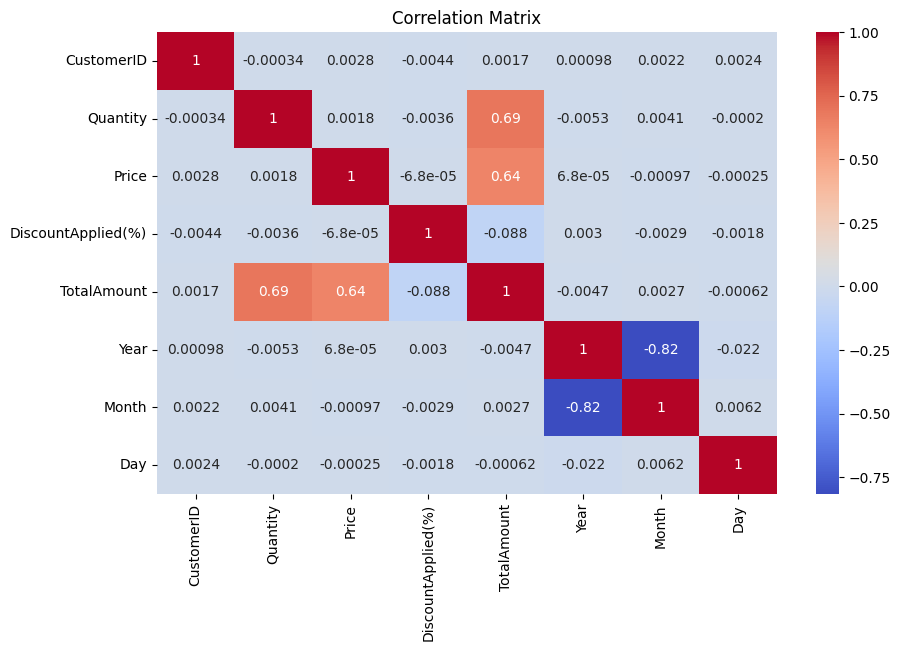

In [5]:

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

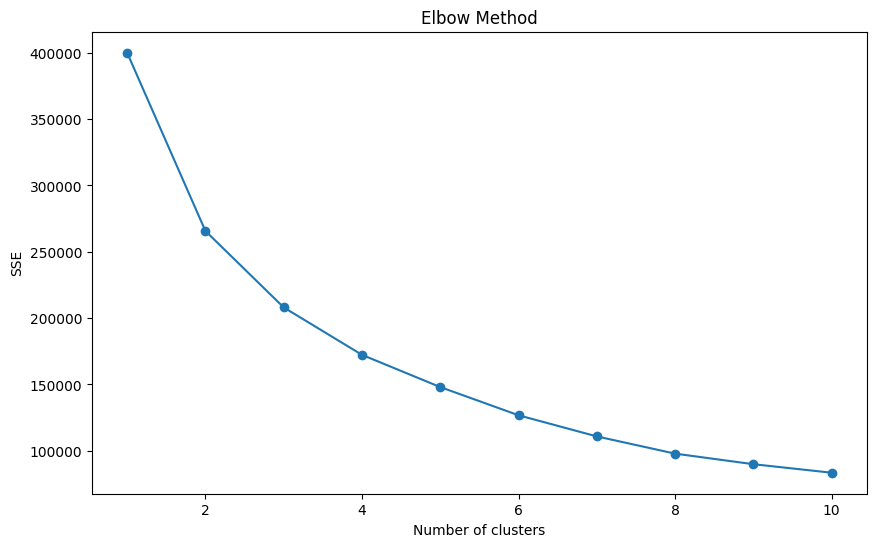

In [7]:
# Clustering Algorithms
# Feature selection for clustering
features = data[['Quantity', 'Price', 'DiscountApplied(%)', 'TotalAmount']]

# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(features_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()


In [8]:
# Apply K-means clustering with optimal number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(features_scaled)
data['Cluster'] = clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


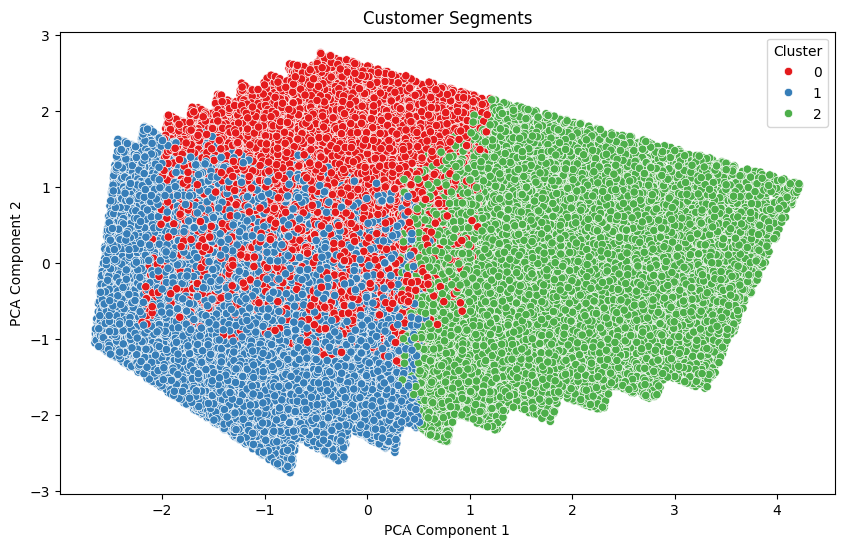

In [9]:
# Visualization of Customer Segments
# Reduce dimensions for visualization using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=data['Cluster'], palette='Set1')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segments')
plt.show()

In [10]:
# Cluster profiles
# Select numeric columns for cluster profiling
numeric_columns = ['Quantity', 'Price', 'DiscountApplied(%)', 'TotalAmount', 'Year', 'Month', 'Day']
cluster_profiles = data.groupby('Cluster')[numeric_columns].mean()
print(cluster_profiles)


         Quantity      Price  DiscountApplied(%)  TotalAmount         Year  \
Cluster                                                                      
0        6.427091  30.124560           10.030784   175.104269  2023.326960   
1        2.332005  56.859293           10.319032   120.825943  2023.329416   
2        6.958903  77.454770            9.635728   480.174185  2023.325086   

            Month        Day  
Cluster                       
0        6.524631  15.671630  
1        6.491173  15.679929  
2        6.523771  15.667530  


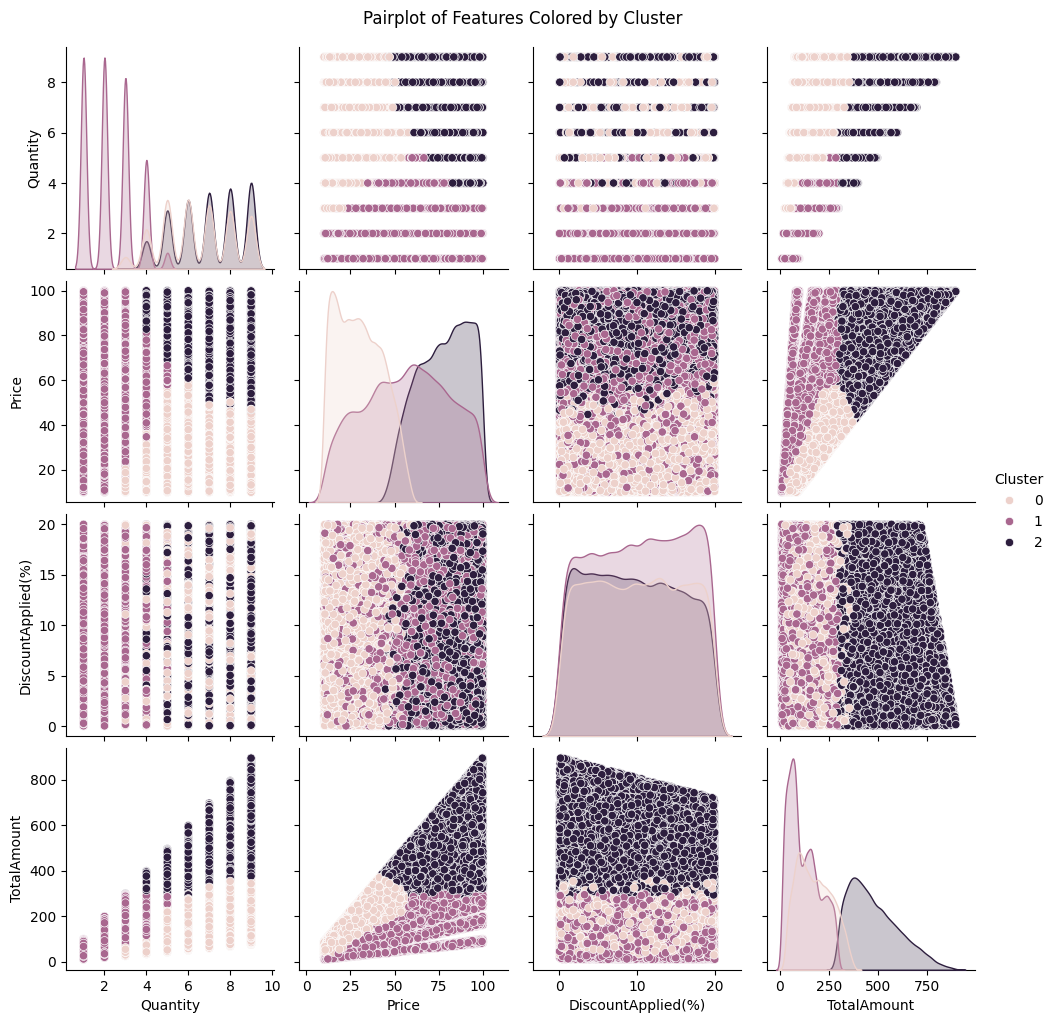

In [11]:
# Additional Visualizations
# Pairplot of the features colored by cluster
sns.pairplot(data, hue='Cluster', vars=['Quantity', 'Price', 'DiscountApplied(%)', 'TotalAmount'])
plt.suptitle('Pairplot of Features Colored by Cluster', y=1.02)
plt.show()


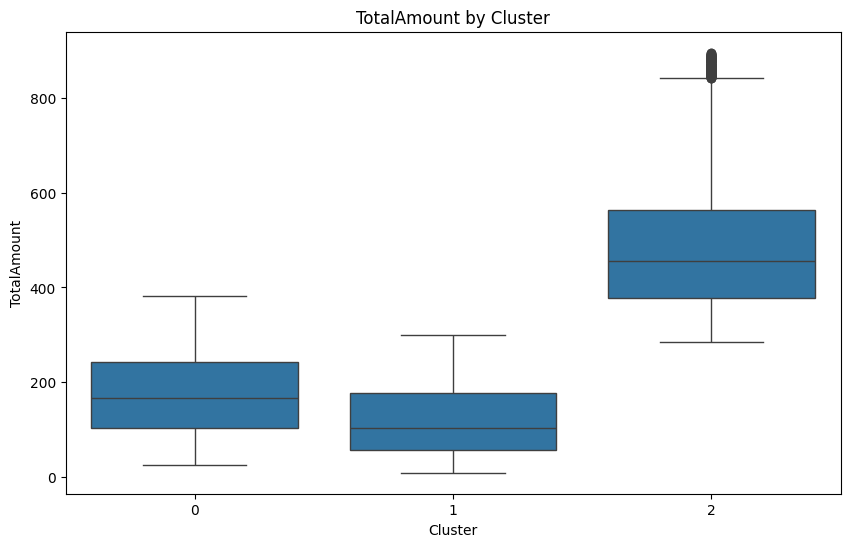

In [12]:
# Boxplot of TotalAmount by Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='TotalAmount', data=data)
plt.title('TotalAmount by Cluster')
plt.show()


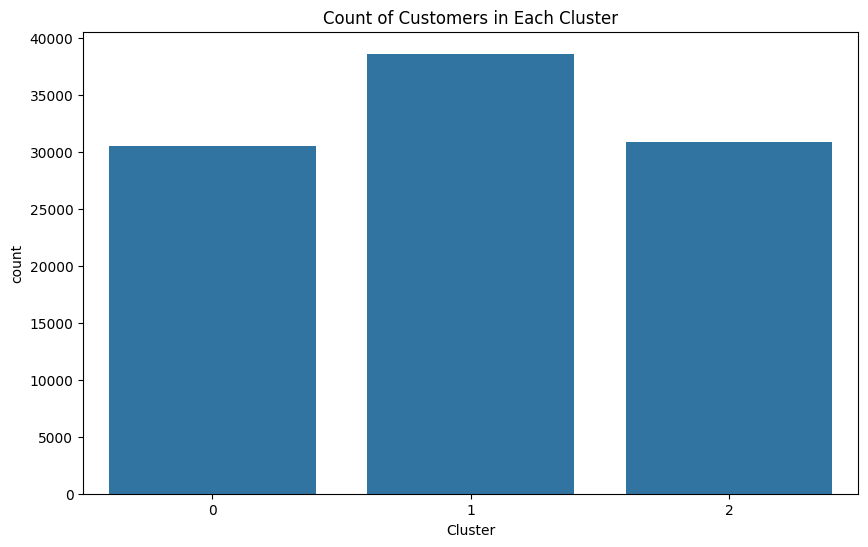

In [13]:
# Countplot of clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=data)
plt.title('Count of Customers in Each Cluster')
plt.show()
